# Sayurbox - Data Scientist Take-Home Test
This task uses the `online-test-dataset.csv`

First, I would like to start with the EDA (exploratory data analysis) before jumping straight on to the training/evaluation sets split and model building

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load the csv data
raw_data = pd.read_csv('./data/online-test-dataset.csv')
# show the first 5 rows and total number of rows
print('Number of rows:', len(raw_data))
raw_data.head()

Number of rows: 858220


,date,store,item,sales
0,1/1/13,1,1,13.0
1,1/2/13,1,1,11.0
2,1/3/13,1,1,14.0
3,1/4/13,1,1,13.0
4,1/5/13,1,1,10.0


## EDA (Exploratory Data Analysis)

I think it is the best practice to not make any addition/changes on the original or raw dataset. That is why I copied the entire `DataFrame` to a new variable

In [3]:
# copy the original dataframe for EDA purposes
df = raw_data.copy()

The easiest and quickest way to get the summary of our data is by using the `.describe()` method. Note that it only applies to numerical data types and not `object` data types

In [4]:
df.describe()

,store,item,sales
count,858220.000000,858220.000000,848302.000000
mean,5.500000,24.000000,52.754637
std,2.872283,13.564668,29.116697
min,1.000000,1.000000,0.000000
25%,3.000000,12.000000,30.000000
50%,5.500000,24.000000,47.000000
75%,8.000000,36.000000,70.000000
max,10.000000,47.000000,231.000000


It is a good practice to always check the data types we are dealing with to match between the types and their values (e.g. `sales` column usually has a `float` or `int`, not `object` data types like string)

In [5]:
# column analysis
print('Number of columns:', len(df.columns))
print(df.dtypes)

Number of columns: 4
date      object
store      int64
item       int64
sales    float64
dtype: object


Most data science projects deal with structured and unstructured data. In the case of structured data (table), the data is often populated by empty/null (indicated by `NaN` values). Before doing our analysis, we can count how many of them inside each column. This dataset has 9918 empty values inside the `sales` column. Considering that the number of rows in our data is 858,220, I think that these values can be ignored because it only accounts for 0.01% of the whole data

In [6]:
# check for null/emtpy values
for c in df.columns:
    print('Number of null/empty values in column "{}": {}'.format(c, df[c].isnull().sum()))

Number of null/empty values in column "date": 0
Number of null/empty values in column "store": 0
Number of null/empty values in column "item": 0
Number of null/empty values in column "sales": 9918


### Data Visualization

Performing data visualization makes the data exploration more understandable and easier to notice if there exist any interesting insights from the data.

In [7]:
# labelling function
def autolabel(plot, font_size=12):
    """
    Provides auto-labelling function in a plot
    
    Arguments:
        - plot: matplotlib.pyplot.plot - the plot you wanted to give labels to
        - font_size: int - font size
    
    Returns:
        Nothing
    """
    for p in plot:
        h = p.get_height()
        ax.annotate('{}'.format(h), fontsize=font_size,
                   xy=(p.get_x() + p.get_width()/2, h),
                   xytext=(0,3),
                   textcoords='offset points',
                   ha='center', va='bottom')

To start, let's take a look at the number of stores in the data. Since the values are from 0 to 9, think of it as the name of the store replaced by those numbers.

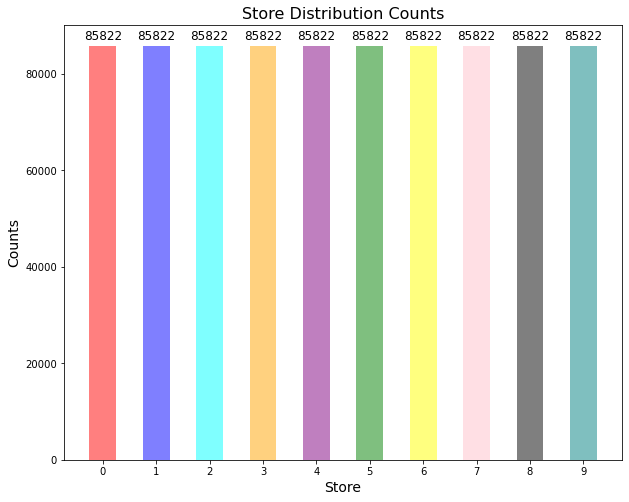

In [8]:
# count the number of stores in the data
df_store = df[['store']].value_counts()
df_store = pd.pivot_table(df_store.to_frame(), values=0, index=[0,1,2,3,4,5,6,7,8,9], aggfunc=np.sum)
df_store = df_store.reset_index()
df_store  = df_store.rename(columns={'index':'store', 0: 'Counts'})

# plot store distribution counts
fig, ax = plt.subplots(figsize=(10,8))
x = np.arange(10)
width = 0.5
bar = ax.bar(x, df_store['Counts'], color=['red','blue','cyan','orange','purple','green','yellow','pink','black','teal'], alpha=.5, width=width)

ax.set_title('Store Distribution Counts', fontsize=16)
ax.set_xlabel('Store', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_xticks(x)

autolabel(bar)

plt.show()

There is no interesting information about this visualization. There are 85822 stores from each store 1 to 9.

Next, let's take a look at the item distribution count. Similar to the previous one, items are indicated by integers from 1 to 47. This time, I use `seaborn` to distinguish different colors for 47 various items.

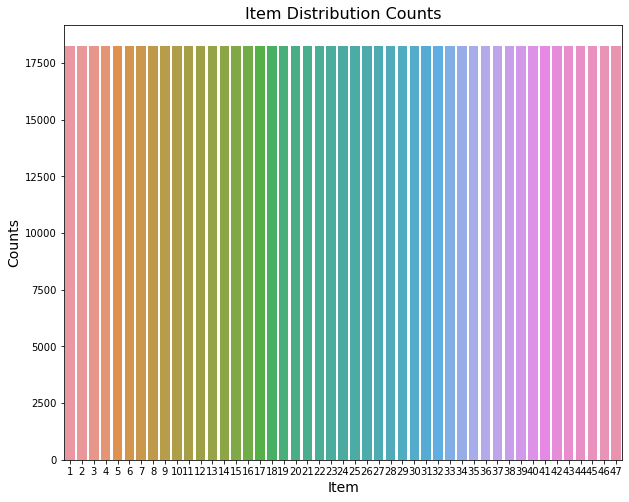

In [9]:
# count the number of items in the data
df_item = df[['item']].value_counts()
df_item = pd.pivot_table(df_item.to_frame(), values=0, index=np.arange(1,48), aggfunc=np.sum)
df_item = df_item.reset_index()
df_item  = df_item.rename(columns={'index':'item', 0: 'Counts'})

# plot item distribution counts
fig, ax = plt.subplots(figsize=(10,8))
x = np.arange(47)
width = 0.5
sns.barplot(data=df_item, x='item', y='Counts')
# bar = ax.bar(x, df_item['Counts'], color=['red','blue','cyan','orange','purple','green','yellow','pink','black','teal'], alpha=.5, width=width)

ax.set_title('Item Distribution Counts', fontsize=16)
ax.set_xlabel('Item', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_xticks(x)

plt.show()

Still, we still can't find any insightful findings that we can use to make our hypothesis. All items are distributed evenly across 47 items.

Next, let's take a look at the sales in multiple items and stores.

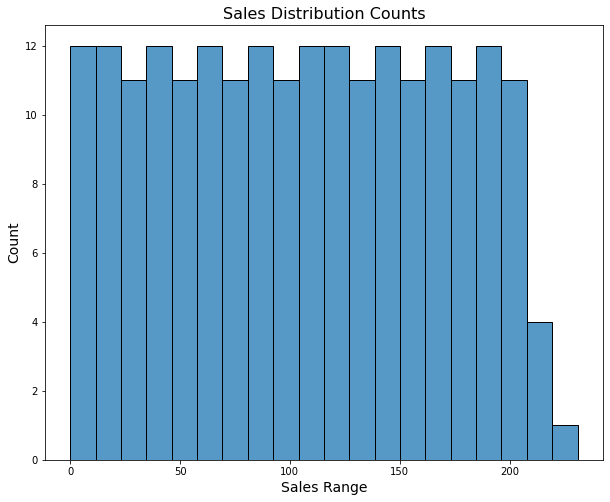

In [10]:
# count the number of sales in each data
df_sales = df[['sales']].value_counts()
df_sales = df_sales.reset_index()

# plot sales distribution counts
fig, ax = plt.subplots(figsize=(10,8))
sns.histplot(data=df_sales, x='sales', bins=20, ax=ax)

ax.set_title('Sales Distribution Counts', fontsize=16)
ax.set_xlabel('Sales Range', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.show()

The histogram above shows the sales range from 0 up to 200. By increasing the size of the bins (`bins=20`), we can see those distribution in more details. The other way to visualize this is by plotting a boxplot. Boxplot plots values by considering quartile values. The left side indicates the 1st quartile, middle for 2nd quartile, and finally right side for 3rd quartile.

C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


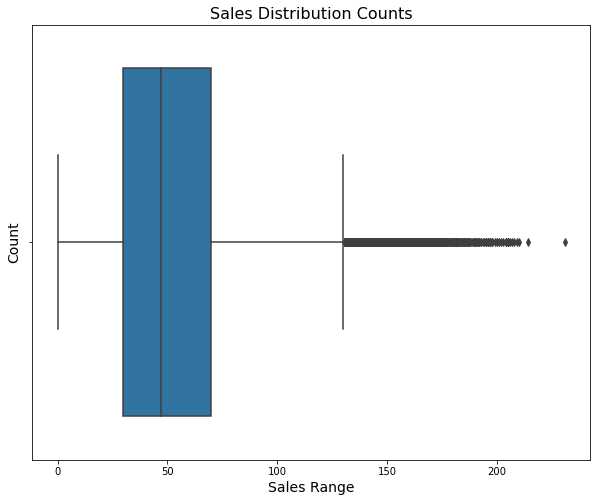

In [11]:
# plot sales distribution counts with boxplot
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(df['sales'])

ax.set_title('Sales Distribution Counts', fontsize=16)
ax.set_xlabel('Sales Range', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.show()

Notice that on the most right side of the boxplot, we can see that the points are not neighboring. This is what we usually call **outliers**. Simply said, outliers are the values that are abnormal in a population. In this example, sales exceeding 200 can be considered as outliers. For most of the case, we should not ignore outliers. These values might give us hidden business insights on why the values exist. Outliers can also happen as a result of human or system error (e.g. a sales person who incorrectly input the values to the database).

In the worst case, outliers can also hurt the performance of our prediction model. This is the situation where we must look into and investigate them. Nevertheless, let's carry on the data exploration without worrying too much about outliers.

### Feature Engineering
>Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms. Feature engineering can be considered as applied machine learning itself.<br>
-Wikipedia (https://en.wikipedia.org/wiki/Feature_engineering#:~:text=Feature%20engineering%20is%20the%20process,as%20applied%20machine%20learning%20itself)

To put it simply, feature engineering is a method to add or create more features from the existing features. Let's see what it looks like.
Remember that the dataset has `date` column in it. Let's say that our superiors requested a report about sales trend from 2014 to 2017. We can directly use the `date` column to extract and group the sales by year. However, that is not effective because the format of the date can change depending on the data itself. Therefore, we need to feature engineer the `date` column into several new columns.

In [12]:
import datetime

# feature engineer the 'date' column into 4 new columns
df['Date'] = pd.to_datetime(df['date'])
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [13]:
df.head()

,date,store,item,sales,Date,day,month,year
0,1/1/13,1,1,13.0,2013-01-01,1,1,2013
1,1/2/13,1,1,11.0,2013-01-02,2,1,2013
2,1/3/13,1,1,14.0,2013-01-03,3,1,2013
3,1/4/13,1,1,13.0,2013-01-04,4,1,2013
4,1/5/13,1,1,10.0,2013-01-05,5,1,2013


Now we can use the `Date`, `day`, `month`, and `year` columns to work with our data exploration.

First, let's take a look at our yearly sales

In [14]:
# group sales by the year and sum them up
yearly_sales = []
for y in df['year'].unique():
    yearly_sales.append(df.loc[df['year'] == y, 'sales'].sum())
    
df_yearly_sales = pd.DataFrame({'year': df['year'].unique(), 'total_sales': yearly_sales})
df_yearly_sales

,year,total_sales
0,2013,7427851.0
1,2014,8543795.0
2,2015,8960093.0
3,2016,9729859.0
4,2017,10090266.0


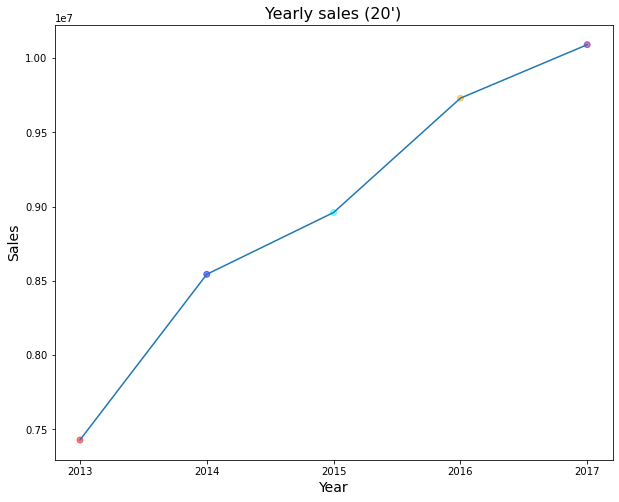

In [15]:
# plot the yearly sales
fig, ax = plt.subplots(figsize=(10,8))
x = df['year'].unique()
width = 0.5
sns.lineplot(data=df_yearly_sales, x='year', y='total_sales')
bar = ax.scatter(x, df_yearly_sales['total_sales'], c=['red','blue','cyan','orange','purple'], alpha=.5)

ax.set_title("Yearly sales (20')", fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Sales', fontsize=14)
ax.set_xticks(x)

plt.show()

<b>It is important that as a data scientist, we do not draw any conclusions from the exploratory data analysis part. However, it is plausible to make a hypothesis that we can test when building the prediction model.</b>

Our initial thoughts might clear that the sales increased for each year across 5 years from 2013 until 2017. We are still unsure about the upward trend and we can make our hypothesis that in the following year (2018), sales might still slightly increase.

Next, let's take a look at the monthly sales. Note that I combined all month sales from all years and sum them up all together. It will take too much space if I split each year into 12 different figures. I might end up with approximately 12x5=60 figures!

In [16]:
# group the sales by month and sum them up
monthly_sales = []
for m in df['month'].unique():
    monthly_sales.append(df.loc[df['month'] == m, 'sales'].sum())
    
df_monthly_sales = pd.DataFrame({'month': df['month'].unique(), 'total_sales': monthly_sales})
df_monthly_sales

,month,total_sales
0,1,2583278.0
1,2,2603956.0
2,3,3438432.0
3,4,3879630.0
4,5,4298154.0
5,6,4433301.0
6,7,4870368.0
7,8,4295726.0
8,9,3874209.0
9,10,3723728.0


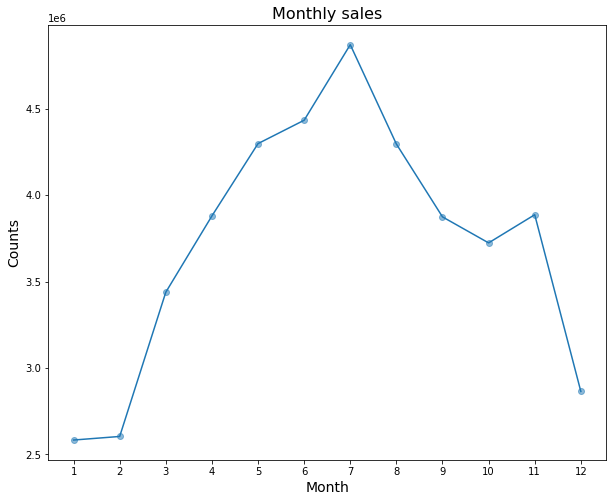

In [17]:
# plot monthly sales
fig, ax = plt.subplots(figsize=(10,8))
x = df['month'].unique()

sns.lineplot(data=df_monthly_sales, x='month', y='total_sales')
bar = ax.scatter(x, df_monthly_sales['total_sales'], alpha=.5)

ax.set_title("Monthly sales", fontsize=16)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_xticks(x)

plt.show()

Surprisingly, sales significantly increased from February to May, and topped the chart in July. We can do further investigation by plotting the sales for each item. By doing this, we can have a rough idea which items are responsible for that sudden sales increase.

Start off by calculating overall item sales throughout the year (from 2013 to 2017)

In [18]:
# calculate overall item sales from 2013 to 2017
overall_item_sales = []
for i in df['item'].unique():
    overall_item_sales.append(df.loc[df['item'] == i, 'sales'].sum())
    
df_overall_item_sales = pd.DataFrame({'item': df['item'].unique(), 'total_sales': overall_item_sales})

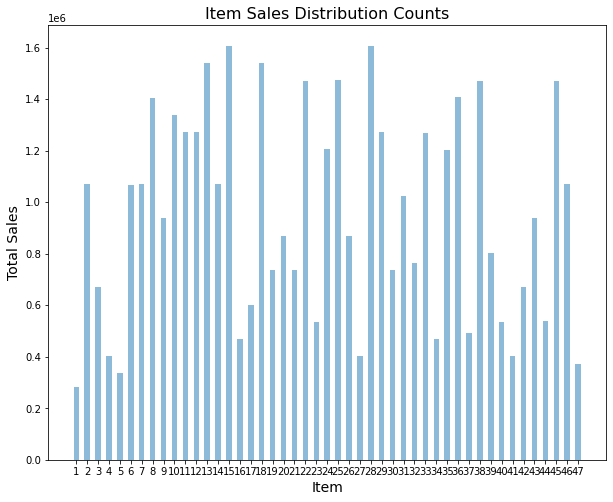

In [19]:
# plot overall item sales
fig, ax = plt.subplots(figsize=(10,8))
x = df['item'].unique()
width = 0.5
bar = ax.bar(x, df_overall_item_sales['total_sales'], alpha=.5, width=width)

ax.set_title('Item Sales Distribution Counts', fontsize=16)
ax.set_xlabel('Item', fontsize=14)
ax.set_ylabel('Total Sales', fontsize=14)
ax.set_xticks(x)

plt.show()

From the figure above, item 15 and 28 mostly contribute to the sales among other items.

Let's look into more details by investigating the July item sales.

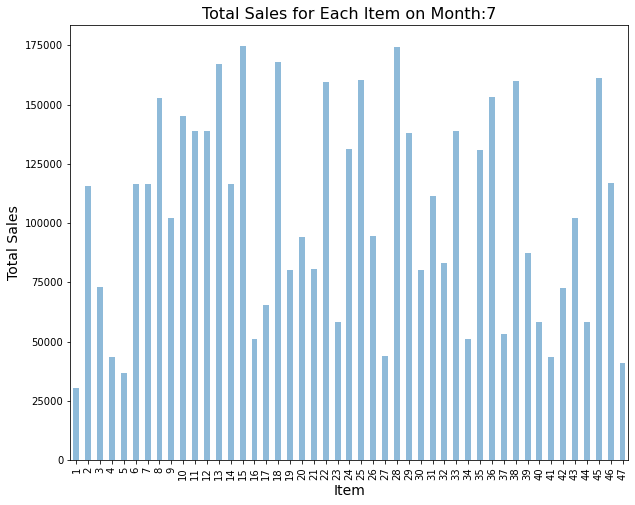

In [20]:
# calculate overall item sales for month i (where i is the month index from 1 to 12)
df_item_sales_month = df[['item', 'sales', 'month']]
df_item_sales_month = df_item_sales_month.groupby(by=['month', 'item']).sum()
df_item_sales_month = df_item_sales_month.reset_index()

# set the month index to July
month_idx = 7
x = df_item_sales_month['item'].unique()
df_temp = df_item_sales_month[df_item_sales_month['month'] == month_idx]
df_temp.plot(kind='bar', x='item', y='sales', legend=None, alpha=.5, figsize=(10,8))

plt.title('Total Sales for Each Item on Month:{}'.format(month_idx), fontsize=16)
plt.xlabel('Item', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)

plt.show()

As expected, item 15 and 28 achieved approximately 170,000 sales each that contributes to the high sales in July.

We can also plot the item sales in each year

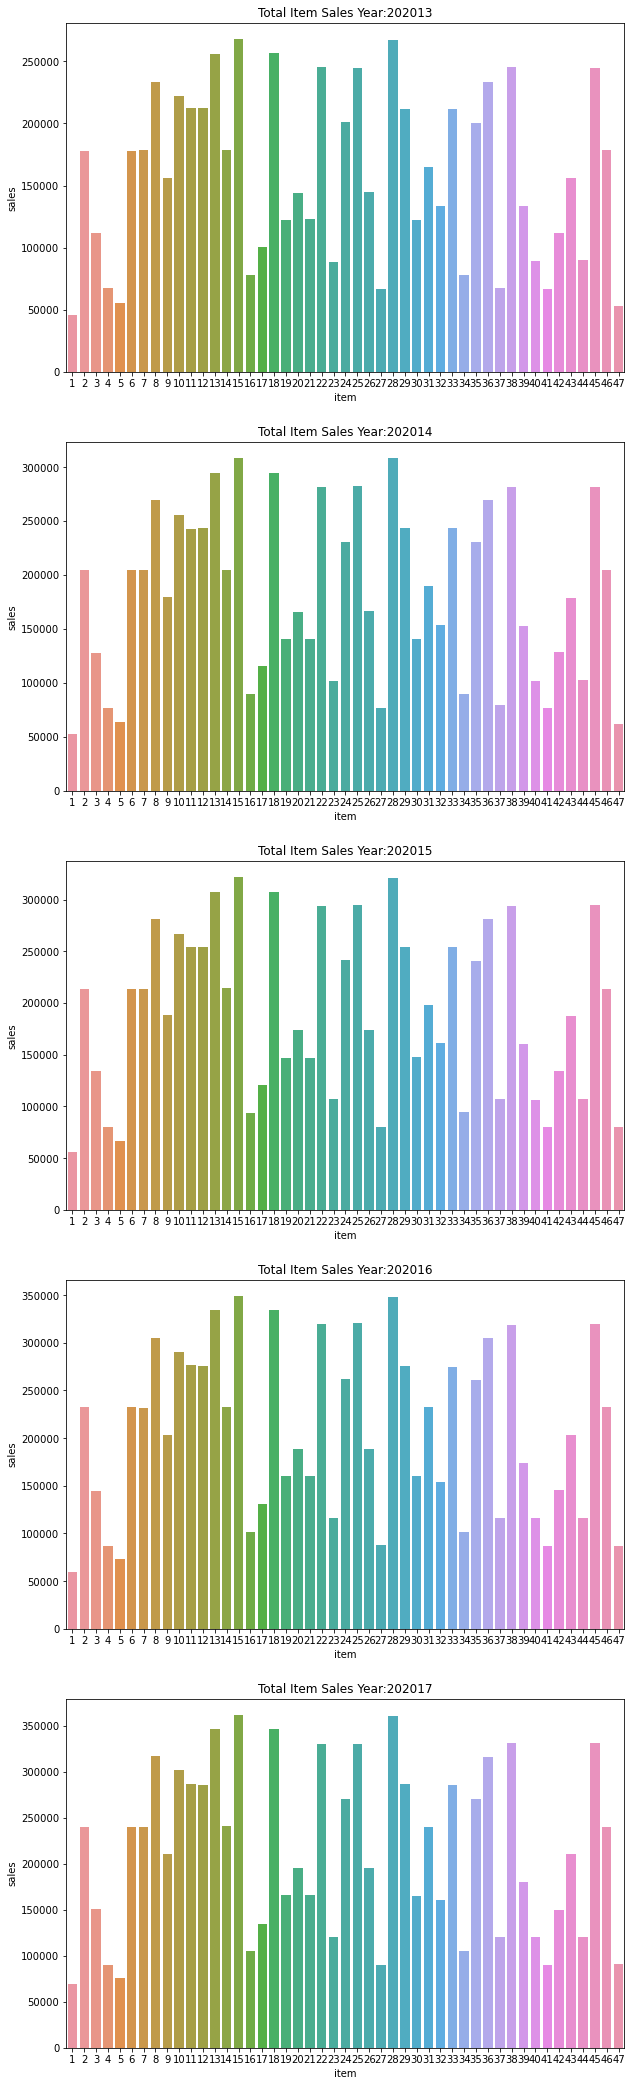

In [21]:
# calculate overall item sales for each year
df_item_sales_year = df[['item', 'sales', 'year']]
df_item_sales_year = df_item_sales_year.groupby(by=['year', 'item']).sum()
df_item_sales_year = df_item_sales_year.reset_index()

# plot sales for each year
years = df_item_sales_year['year'].unique()
nrows = 5
ncols = 1
cnt = 1

fig = plt.figure(figsize=(10,15))
for i in years:
    plt.subplot(nrows, ncols, cnt)
    plt.title('Total Item Sales Year:{}'.format(i))
    plt.xlabel('item')
    sns.barplot(x='item', y='sales', data=df_item_sales_year[df_item_sales_year['year']==i])
    cnt = cnt + 1

plt.subplots_adjust(top=2)
plt.show()

We cannot really extract any information from these plots because they are similar to each other. However, if you notice on the y axis (sales), you will see the upper range keeps increasing from 250,000 in 2013 to 350,000 in 2017. This reflects the figure we plot earlier about the yearly sales where it shows an upward trend.

# Building Forecasting Model

Onto the final part, we are finally ready to build the forecasting model. Unlike any machine learning task, time series forecasting/prediction is distinct from recommendation, clustering, and any other task. In particular, this task exclusively utilizes dates, seasonalities, trends, noises, and other aspects.

Let's start with the data. I copied the original data to a new variable called `df_copy`

In [22]:
import datetime
import statsmodels.api as sm

# copy the original data
df_copy = raw_data.copy()

# fill-in the empty/null values with mean sales across the data
sales_avg = df_copy['sales'].mean()
df_copy = df_copy.fillna(value=sales_avg, axis=1)

# feature engineer 'date' to datetimeformat and create another column called 'Date'
df_copy['Date'] = pd.to_datetime(df_copy['date'])

This time, I only create another feature called 'Date' apart from 'date' that has a `datetime` object. This column contains a full format of the date from date, month, and year in a uniform format.

Since we are dealing with 47 different items in 10 different stores, let's take an example to build a forecast model for an item in a specific store. If we look at each item, the sales always fluctuates in each day. Since we do not need the columns other than 'Date' and 'sales', we can directly drop/remove them from the data.

In [23]:
# select specific item i and store j
item = 1
store = 1
df_item_store = df_copy[(df_copy['item']==item) & (df_copy['store']==store)]
# drop unused columns
to_drop = ['date', 'store', 'item']
df_item_store = df_item_store.drop(to_drop, axis=1)
# set the index to 'Date' column
y = df_item_store.set_index('Date')
y.head()

,sales
Date,
2013-01-01,13.0
2013-01-02,11.0
2013-01-03,14.0
2013-01-04,13.0
2013-01-05,10.0


Let's plot the sales value according to the date from 2013 up to 2017.

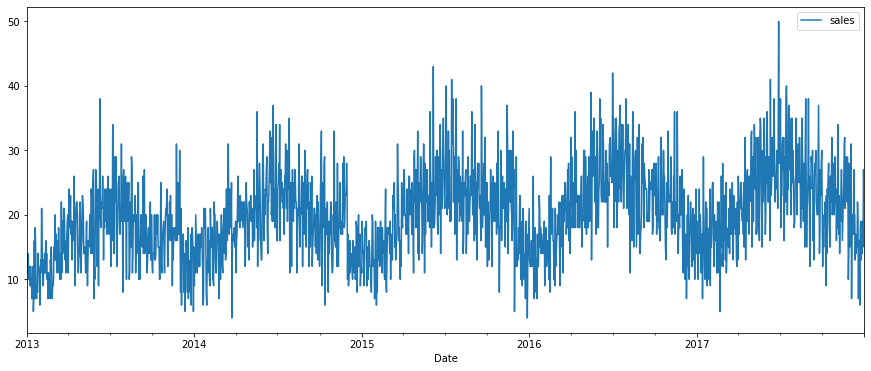

In [24]:
# plot sales from 2013 to 2017 for item i store j
y.plot(figsize=(15,6))

plt.show()

Another way to visualize the data is to use a technique called time-series decomposition to decompose the time series into 3 components: trend, seasonality, and noise

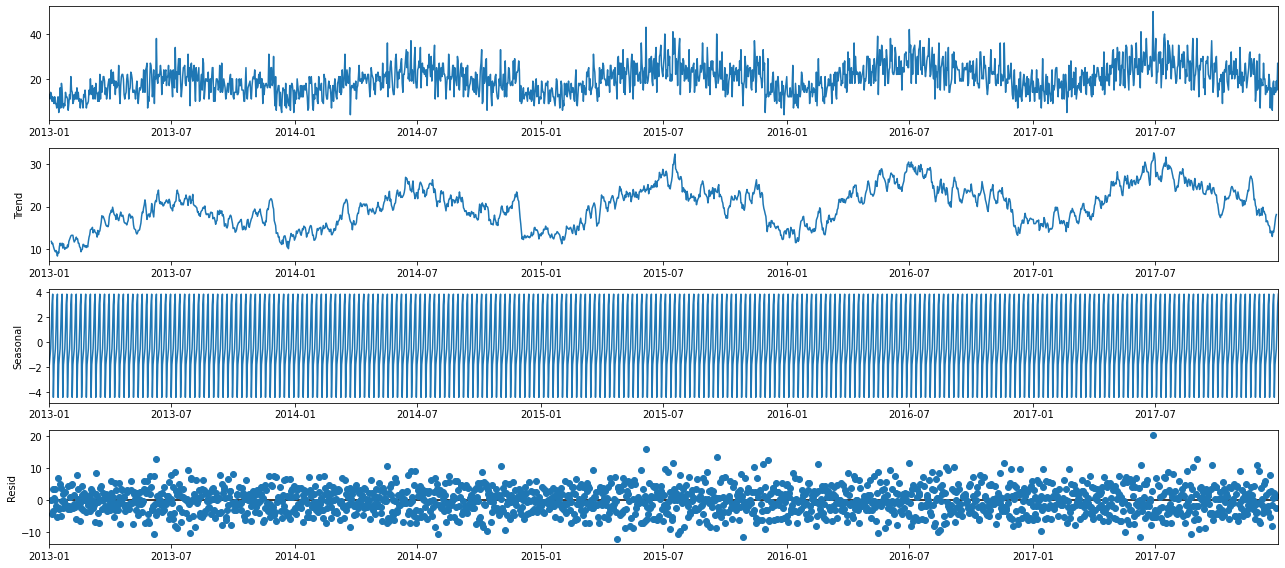

In [25]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8 # set figsize

# plot time-series decomposition
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

The trend plot shows a slight positive trend for the item in a specific store. For seasonality plot however, does not present obvious seasonality. It seems like item 1 from store 1 does not have peak seasons where the sales blows up compared to other dates.

## Forecasting Model - ARIMA
ARIMA is probably one of the most used method in time-series forecasting. ARIMA is a combination of several methods: AutoRegressive Integrated Moving Average. As the name suggests, ARIMA requires parameters for the seasonality (p), trend (d), and noise (q) in the data.

For a machine learning model that requires lots of parameters, it can be a hassle to choose the optimal parameters manually. We have to think various combinations of different parameters. Luckily, we can let the system to do that for us instead. This is where **grid search** comes in to find those optimal set of parameters in order to build the best model for our task.

In [26]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


Before that, let's split our dataset into train and test set. In general, train-test split can be done randomly, but not in this case. Why?<br>
If we randomly split our dataset, the value the model have to forecast will also random. In other words, the model does not predict trends within a time series in the future. However, the case is different for other task (e.g. clustering) where the model is trying to predict which point belongs to which cluster. It does not affect the behavior of the model whether we randomize it or not.

For this task, I split the train and test set according to the dates. Every sales before 2017 is assigned to the training set and sales after 2017 is assigned to the test set. By doing it this way, I can compare how far or close the model's forecast against the ground truth (test set) is.

In [27]:
# split data to train and test set
y_train = y[:'2017-01-01']
y_test = y['2017-01-01':]
print(len(y_train))
print(len(y_test))

1462
365


Now we can do the grid search for the training set

In [28]:
# ARIMA parameters grid search
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_train, order=param, seasonal_order=param_seasonal, enforce_stationary=False, enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:12982.67127325659


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:11777.101697825234
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:9952.4490311974


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:9379.734037264725
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:10006.133387706932


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:9479.61714394137
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:9636.145663466636


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:9381.654758196051
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:11724.187060522618


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:11069.215098271176
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:9926.398265506563


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:9310.31675598749


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:9959.517402728194


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:9406.460433695032


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:9590.660871727618


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:9301.283148773662
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:9798.369042142069
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:9799.45679689765
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:10763.506430046606


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\en

ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:9783.986465824994
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:9799.516422332043


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:9782.331856852812
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:10353.309123331126


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:9785.434630797536
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:9016.439969776635


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:9014.140024040149


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:9955.792464266828


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:9008.669097523441
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:9015.127838143786


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:9004.503364124328


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:9635.601048386749


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:9007.871255470829
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:9766.726531516286


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:9768.699762750468
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:9932.973056442623


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:9289.727519297046


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:9768.699780119528


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:9385.579859708012


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:9593.404906546635


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:9271.53863303788


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:9026.497193550818


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:9024.202402441497
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:9919.81570200877


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:9007.200328931143


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:9025.18807029826


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:9029.972634073489


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:9592.660611526717


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:9006.466578535666
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:9506.522194922749


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:9494.078731430338
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:10557.63757341095


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:9493.567113284593
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:9496.552914765321


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:9485.110115411231


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:10131.471062376453


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:9484.546596610828
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:9011.523511720707


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:9010.571787289631


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:9936.088515902047


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:9004.03000790353


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:9011.183345045658


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:8999.97307391982


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:9597.31488175601


C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:9004.117289347567


You might notice that there is a "hidden" metric called AIC (Akaike Information Criteria) to pick the best set of parameters. It basically measure 2 things:
1. Goodness of the fit
2. Simplicity/parsimony

**The lower the value of AIC is, the "better" model we will get.**<br>
As we can see from the output, an AIC value of 8999.97307391982 is the smallest among them. With that said, we obtain the following parameters:<br>
`ARIMA(1, 1, 1)x(1, 0, 1, 12)`

Now we can create a new ARIMA model by specifying those parameters:

In [29]:
# create new ARIMA model based on the best parameters
mod = sm.tsa.statespace.SARIMAX(y_train,
                                order=(1, 1, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
# fit the model
results = mod.fit()
print(results.summary().tables[1])

C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Archel\anaconda3\envs\machine-learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0598      0.030      2.021      0.043       0.002       0.118
ma.L1         -0.9097      0.013    -71.935      0.000      -0.935      -0.885
ar.S.L12       0.4933      0.186      2.648      0.008       0.128       0.858
ma.S.L12      -0.5772      0.175     -3.293      0.001      -0.921      -0.234
sigma2        27.7593      0.964     28.793      0.000      25.870      29.649


We can also run model diagnostics to analyze any unusual behavior from our model

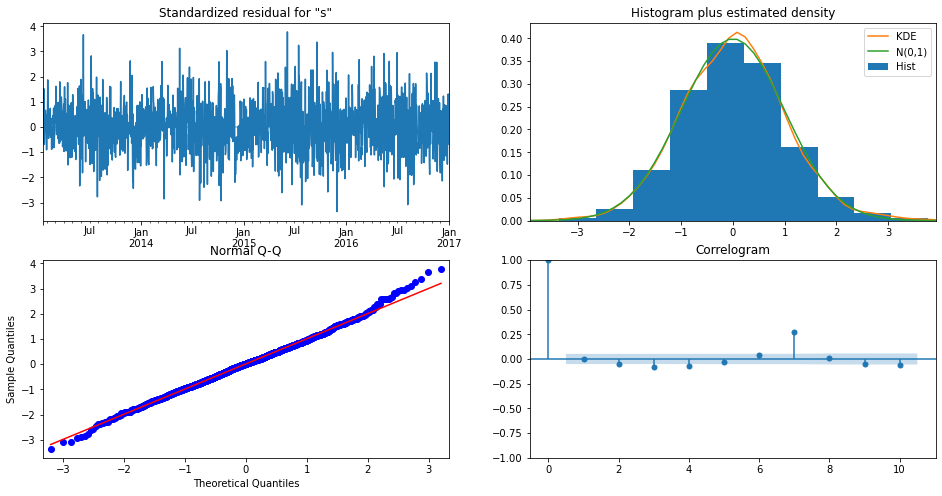

In [30]:
# run diagnostics by plotting the results
results.plot_diagnostics(figsize=(16, 8))
plt.show()

The plots above are generally showing that the residual errors are normally distributed.

Finally, we can compare our model's prediction with the ground truth. Let's start with the training data.

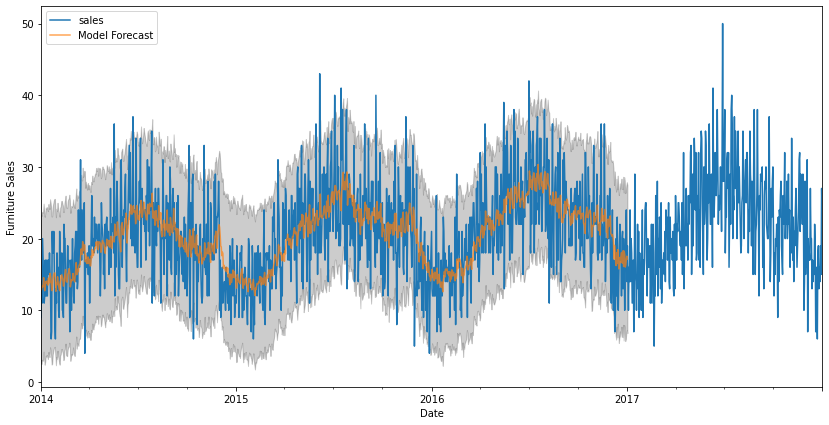

In [31]:
# plot model's prediction on training data
train_preds = results.get_prediction(start=pd.to_datetime('2014-01-01'), dynamic=False)
pred_ci = train_preds.conf_int()
ax = y['2014':].plot(label='observed')
train_preds.predicted_mean.plot(ax=ax, label='Model Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

It is actually not that bad, because the model can capture the trends and seasonalities in the data, even though the values are not exactly the same. The model can exclusively predict on which time frame the sales will start to increase (typically on June/July).

How about at test time?

In [32]:
# calculate MSE and RMSE for test predictions with ARIMA
test_preds = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False, end=pd.to_datetime('2017-12-31'))
y_forecasted = test_preds.predicted_mean.values
y_truth = y_test.values[:,0]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 69.28
The Root Mean Squared Error of our forecasts is 8.32


Here, I introduced another metric called the MSE (Mean Squared Error) and RMSE (Root Mean Squared Error). Both MSE and RMSE are commonly used in regression type of problem to measure how far/close the model's prediction against the ground truth. Bigger value leads toward a bad model, meaning that the predictions are far off from the actual value while smaller value means that the model is pretty good to make predictions that are close to the actual values.<br>

The ARIMA model got values of RMSE and MSE of 69.28 and 8.32 respectively on the test set.

The actual performance of the model in the test set can be seen in more details by plotting the prediction values against the actual values.

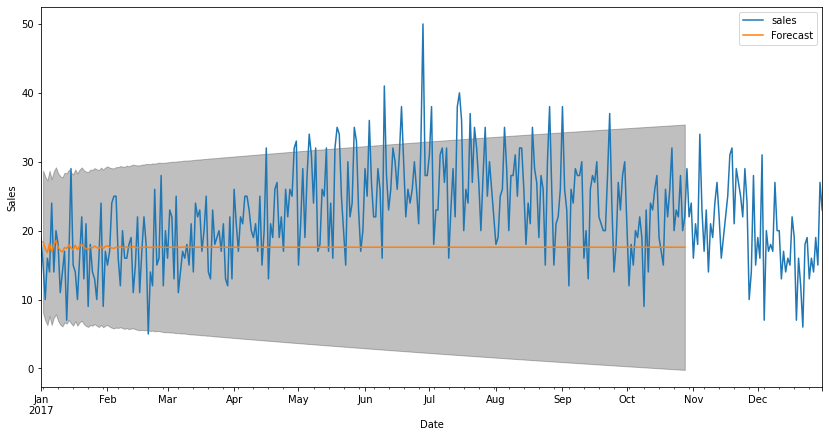

In [33]:
# plot future forecast and compare it to the test data
pred_uc = results.get_forecast(steps=300)
pred_ci = pred_uc.conf_int()
ax = y_test.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

Now we can clearly see that the model only predicts a straight line. This means that the model cannot capture trends and seasonalities in the test data unlike the previous performance on training data.

## Forecasting Model - Prophet (FBProphet)
Here, I will introduce another algorithm called the Prophet algorithm, specifically the FBProphet. This technique was developed by Facebook and now they are open sourcing [Prophet](https://github.com/facebook/prophet) available for both Python and R.

Prophet is exclusively developed and optimized for business forecast that they encountered at Facebook:
- hourly, daily, or weekly observations with at least a few months (preferably a year) of history
- strong multiple “human-scale” seasonalities: day of week and time of year
- important holidays that occur at irregular intervals that are known in advance (e.g. the Super Bowl)
- a reasonable number of missing observations or large outliers
- historical trend changes, for instance due to product launches or logging changes
- trends that are non-linear growth curves, where a trend hits a natural limit or saturates

Additional advantage we can get is that with Prophet, the processes are completely automatic. If the results are unsatisfactory, we can easily tweak the easily-interpretable parameters to improve the forecasts. The following diagram illustrates how the forecasting works:

<img src='./images/prophet_modelling_phase.png' width=400 height=400>

### How Prophet Works?
At its core, the Prophet procedure is an **additive regression** model with four main components:

- A piecewise linear or logistic growth curve trend. Prophet automatically detects changes in trends by selecting changepoints from the data.
- A yearly seasonal component modeled using Fourier series.
- A weekly seasonal component using dummy variables.
- A user-provided list of important holidays.

**Note: All of these information are taken from this [link](https://research.fb.com/prophet-forecasting-at-scale/). Please visit the website to learn more about Prophet.**


Moving on with the code, I recreate the whole data so that we can work in a fresh new data.<br>
As usual, I performed feature engineering, drop the unused columns, and split it into training and test data.

In [34]:
# copy the original data
df_copy = raw_data.copy()

# fill empty/null values with mean
sales_avg = df_copy['sales'].mean()
df_copy = df_copy.fillna(value=sales_avg, axis=1)

# convert the 'date' column to datetime and create another column called 'Date'
df_copy['Date'] = pd.to_datetime(df_copy['date'])

# only focus on particular item i store j
item = 1
store = 1
df_item_store = df_copy[(df_copy['item']==item) & (df_copy['store']==store)]
# drop unused columns
to_drop = ['date', 'store', 'item']
df_item_store = df_item_store.drop(to_drop, axis=1)
# set the index to 'Date' column instead of default index
y = df_item_store.set_index('Date')
# split data to train and test set
y_train = y[:'2017-01-01']
y_test = y['2017-01-01':]

FBProphet package requires the `DataFrame` to have columns named `ds` for the dates and `y` for the sales value.

In [35]:
from fbprophet import Prophet

# rename the column headers to 'ds' and 'y'
y_train = y_train.reset_index()
y_train = y_train.rename(columns={'Date': 'ds', 'sales': 'y'})
y_test = y_test.reset_index()
y_test = y_test.rename(columns={'Date': 'ds', 'sales': 'y'})

# creates the Prophet model
prophet_model = Prophet(interval_width=0.95)
prophet_model.fit(y_train)

Importing plotly failed. Interactive plots will not work.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Next, we will tell the trained model to make future forecasts

In [36]:
# make forecasts for 36 periods
forecast = prophet_model.make_future_dataframe(periods=36, freq='MS')
forecast = prophet_model.predict(forecast)

Let's plot those future forecasts in a figure

<Figure size 1296x432 with 0 Axes>

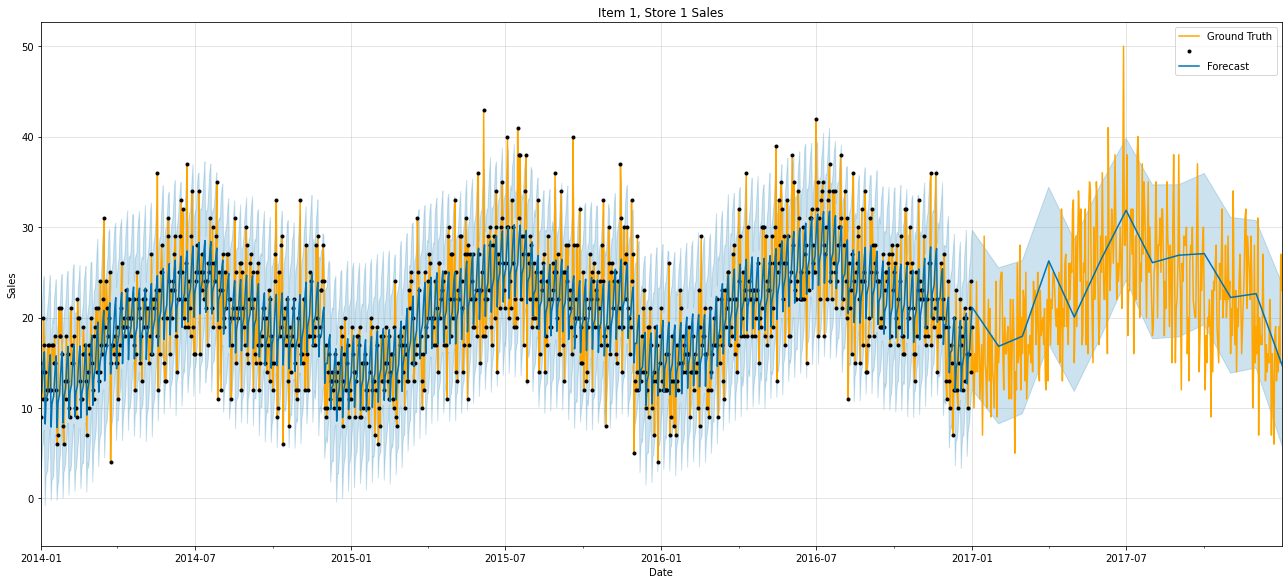

In [50]:
# plot future forecasts compared to the training and test data
plt.figure(figsize=(18, 6))
ax = y['2014':].plot(label='observed', color='orange')
prophet_model.plot(forecast, xlabel = 'Date', ylabel = 'Sales', figsize=(15,6), ax=ax)
plt.title('Item {}, Store {} Sales'.format(item, store));
plt.legend(['Ground Truth', '', 'Forecast'])
plt.show()

The orange-yellowish lines are the ground truth (labels) and the blue lines are the model's forecasts. As we can see, the Prophet model can also capture trends and seasonalities in both train and test data. This model is much better compared to the previous ARIMA model.

In [39]:
# MSE and RMSE Prophet model
y_forecasted = forecast['yhat'].loc[:364] # get the first 365 values only
y_truth = y_test.values[:,1]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 72.62
The Root Mean Squared Error of our forecasts is 8.52


Finally, plot the trends for the Prophet model

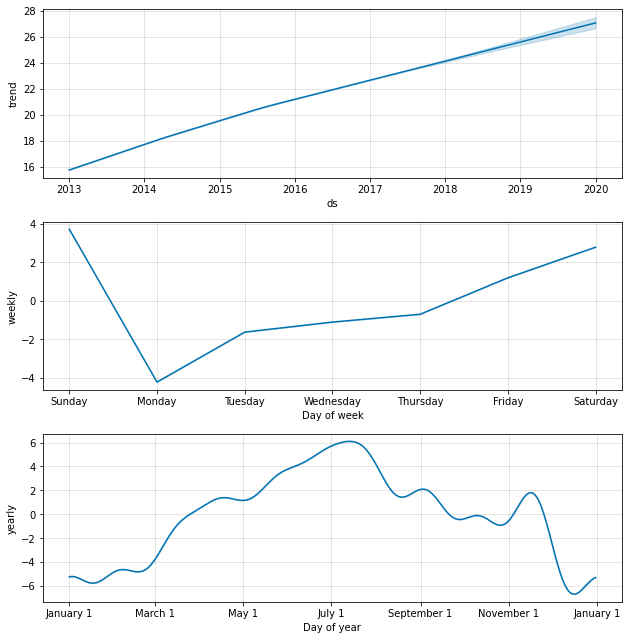

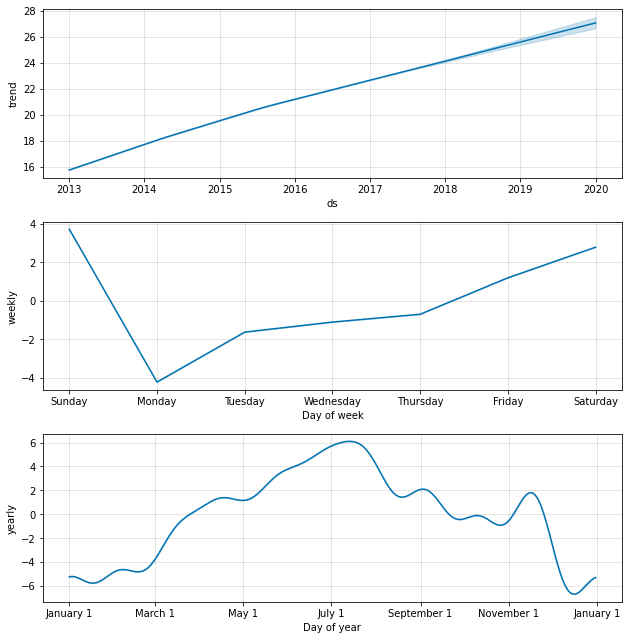

In [40]:
# plot trends, seasonalities components
prophet_model.plot_components(forecast)

The sales linearly increases over time and it is still keep growing until 2020. As expected, the best sales is on July and the worst sales at the beginning of the month on January.

## Conclusion

From this project, we can conclude several things after trying building ARIMA and Prophet models:
1. Our hypothesis earlier about the sales graph shows a positive linear trend each year is true, because our Prophet model prediction exactly proved that.
2. The sales always blow up on July while subsided on January.